# Content List 
#### 01. Import Libraries and Data
#### 02. Consider PII & Security Implications 
#### 03. Customer Behavior by Geography 
#### 04. Excluding Low-Activity Customers
#### 05. Customer Profiles
#### 06. Profile Distribution Visual
#### 07. Data Aggregates
#### 08. Profile, Region, Department Comparison
#### 09. Comparison Charts
#### 10. Key Questions

# 01. Import Libraries and Data

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing orders, products, and customers merged dataframes 

path = r'C:\Users\maple\OneDrive\Desktop\CareerFoundry\Instacart Basket Analysis'
ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_merged.pkl'))

# 02. Consider PII & Security Implications 

In [3]:
pd.set_option('display.max_columns', None) 
ords_prods_custs.head()

,order_id,user_id,number_of_orders_placed,orders_day_of_week,order_hour_of_day,days_since_prior_order,no_prior_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,exists,price_label,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### Having already removed the columns containing linkable PII (first name, last name), there is no data in the dataframe that can be used to directly identify the identity of any customer. PII present such as gender, state, age, dependents, marital status, and income are all unlinkable PII, and necessary to conduct analysis and answer business questions. As such, no further changes will be made to the dataset to address PII. 

# 03. Customer Behaviour by Geography

In [4]:
# Using a For-Loop to categorize states by regions Northeast, Midwest, South, and West and assigning to list 'result'

result = []

for value in ords_prods_custs['state']:
  if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
    result.append('Northeast')
  elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
    result.append('Midwest')
  elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:  
    result.append('South')
  else:
    result.append('West')
    

In [5]:
# Creating a new region column using the result list
ords_prods_custs['region'] = result

In [6]:
ords_prods_custs['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [7]:
# Creating a cross tab of region and spender_flag columns to compare spending behaviors of customers by region
crosstab = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['spender_flag'], dropna = False)

In [8]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### Most Instacart customers live in the South, followed by the West, Midwest, and Northeast. While the number of customers by region differs, the proportion of high and low spenders by region are similar. Across each region, high spenders make up roughly 2% of the customer base, compared to 98% low spenders. 

# 04. Excluding Low-Activity Customers

In [9]:
# Using loc() function to create flag identifying low-activity customers with less than 5 orders. 

ords_prods_custs.loc[ords_prods_custs['max_order'] < 5, 'spender_activity_flag'] = 'Low activity spender'

In [10]:
# Using loc() function to create flag identifying normal activity customers with 5 or more orders. 

ords_prods_custs.loc[ords_prods_custs['max_order'] >= 5, 'spender_activity_flag'] = 'Normal activity spender'

In [11]:
ords_prods_custs['spender_activity_flag'].value_counts(dropna = False)

Normal activity spender    30964564
Low activity spender        1440295
Name: spender_activity_flag, dtype: int64

In [12]:
ords_prods_custs.head()

,order_id,user_id,number_of_orders_placed,orders_day_of_week,order_hour_of_day,days_since_prior_order,no_prior_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,exists,price_label,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region,spender_activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity spender
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity spender
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity spender
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity spender
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid range product,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity spender


In [ ]:
# Exporting dataframe with low activity flag
ords_prods_custs.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_activity.pkl'))

In [2]:
# Importing dataframe with low activity flag

path = r'C:\Users\maple\OneDrive\Desktop\CareerFoundry\Instacart Basket Analysis'
ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_activity.pkl'))

In [3]:
# Creating a new dataframe of only normal activity spenders
ords_prods_custs_2 = ords_prods_custs[ords_prods_custs['spender_activity_flag'] == 'Normal activity spender']

In [4]:
ords_prods_custs_2.shape

(30964564, 33)

In [ ]:
# Exporting dataframe of only normal activity spenders. Exporting in chunks due to memory issues. 
ords_prods_custs_2[:10000000].to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_normal_activity_1.pkl'))
ords_prods_custs_2[10000000:20000000].to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_normal_activity_2.pkl'))
ords_prods_custs_2[20000000:30964564].to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_normal_activity_3.pkl'))

# 05. Customer Profiles

In [5]:
# Creating profile variable and young professional profile for customers with income > 50,000 and age <= 30
ords_prods_custs_2.loc[(ords_prods_custs_2['income']>50000) & (ords_prods_custs_2['age'] <= 30), 'profile'] = 'Young professional'

C:\Users\maple\AppData\Local\Temp\ipykernel_22176\4076018452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_2.loc[(ords_prods_custs_2['income']>50000) & (ords_prods_custs_2['age'] <= 30), 'profile'] = 'Young professional'


In [13]:
# Creating wealthy retiree profile for customers with income > 100,000 and age >= 65
ords_prods_custs_2.loc[(ords_prods_custs_2['income']>100000) & (ords_prods_custs_2['age'] >= 65), 'profile'] = 'Wealthy retiree'

In [8]:
# Creating high income no children profile for customers with married marital status and 0 dependents
ords_prods_custs_2.loc[(ords_prods_custs_2['income'] >= 100000) & (ords_prods_custs_2['number_of_dependents'] == 0), 'profile'] = 'High income no children'

In [9]:
# Creating new parent profile for customers with 1 dependent and a purchase in the baby department
ords_prods_custs_2.loc[(ords_prods_custs_2['department_id']== 18) & (ords_prods_custs_2['number_of_dependents'] >= 1), 'profile'] = 'New parent'

In [10]:
# Creating pet owner profile for customers with 0 dependents and a purchase in the pet department
ords_prods_custs_2.loc[(ords_prods_custs_2['department_id']== 8), 'profile'] = 'Pet owner'

In [11]:
# Creating nuclear family profile for customers married with children
ords_prods_custs_2.loc[(ords_prods_custs_2['marital_status'].isin(['married'])) & (ords_prods_custs_2['number_of_dependents'] >= 1), 'profile'] = 'Nuclear family'

# 06. Profile Distribution Visual

In [14]:
ords_prods_custs_2['profile'].value_counts(dropna = False)

Nuclear family             17422008
Wealthy retiree             5741763
NaN                         3116746
Young professional          2498663
High income no children     2142084
Pet owner                     23919
New parent                    19381
Name: profile, dtype: int64

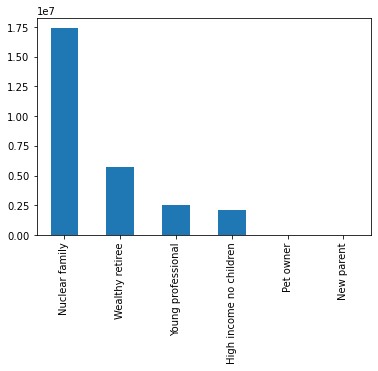

In [15]:
profile_bar = ords_prods_custs_2['profile'].value_counts().plot.bar()

# 07. Data Aggregates

In [16]:
# Aggregating the mean, min, and max prices by profile 
ords_prods_custs_2.groupby('profile').agg({'prices':['mean','min','max']})

prices                
                             mean       min   max
profile                                          
High income no children  7.949219  1.000000  25.0
New parent               7.722656  1.099609  15.0
Nuclear family           7.750000  1.000000  25.0
Pet owner                7.984375  1.000000  15.0
Wealthy retiree          7.953125  1.000000  25.0
Young professional       7.949219  1.000000  25.0

In [17]:
# Aggregating the mean, min, and max number of orders placed by profile 
ords_prods_custs_2.groupby('profile').agg({'number_of_orders_placed':['mean','min','max']})

number_of_orders_placed        
                                           mean min max
profile                                                
High income no children               18.411389   1  99
New parent                            18.930241   1  99
Nuclear family                        17.775794   1  99
Pet owner                             15.704419   1  99
Wealthy retiree                       17.829982   1  99
Young professional                    18.010552   1  99

# 08. Profile, Region, Department Comparison

In [18]:
# Creating a crosstab to compare profiles and region
region_profiles = pd.crosstab(ords_prods_custs_2['region'], ords_prods_custs_2['profile'], dropna = False)

In [19]:
region_profiles

profile,High income no children,New parent,Nuclear family,Pet owner,Wealthy retiree,Young professional
region,,,,,,
Midwest,526181,5057,4067886,6169,1338228,577847
Northeast,343230,3157,3079423,4161,1043604,447412
South,717908,6636,5791745,7269,1893622,862618
West,554765,4531,4482954,6320,1466309,610786


In [20]:
# Creating a crosstab to compare profiles and department
department_profiles = pd.crosstab(ords_prods_custs_2['department_id'], ords_prods_custs_2['profile'], dropna = False)

In [21]:
department_profiles

profile,High income no children,New parent,Nuclear family,Pet owner,Wealthy retiree,Young professional
department_id,,,,,,
1,148591,0,1189248,0,399406,173323
2,2443,0,19073,0,6312,2944
3,81833,0,626064,0,211418,92755
4,640879,0,5083031,0,1719488,763238
5,11729,0,80204,0,25756,12190
6,18276,0,142729,0,48512,22076
7,171446,0,1466117,0,454001,194558
8,0,0,50516,23919,18625,0
9,58966,0,457996,0,158994,70539


# 09. Comparison Charts

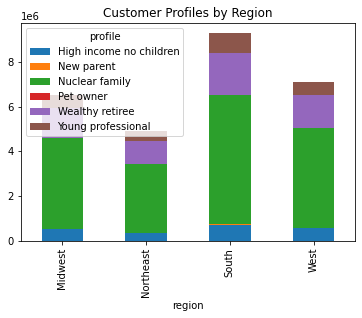

In [22]:
region_profile_bar = region_profiles.plot.bar(stacked = True, title = 'Customer Profiles by Region')

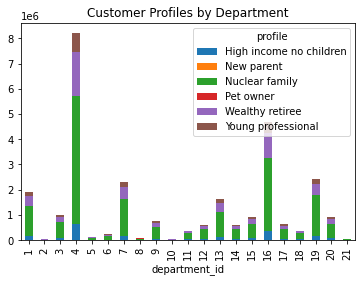

In [23]:
department_profile_bar = department_profiles.plot.bar(stacked = True, title = 'Customer Profiles by Department')

In [ ]:
# Exporting visualizations
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_bar.png'),bbox_inches='tight')
region_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_profile_bar.png'),bbox_inches='tight')
department_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_profile_bar.png'),bbox_inches='tight')

# 10. Key Questions

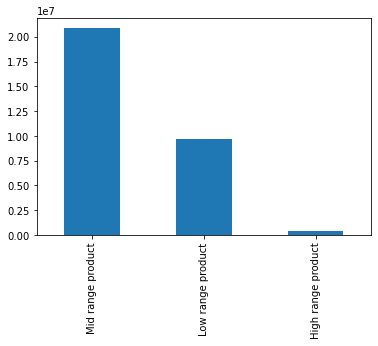

In [25]:
# Creating a bar chart of orders by price labels
price_label_bar = ords_prods_custs_2['price_label'].value_counts().plot.bar()

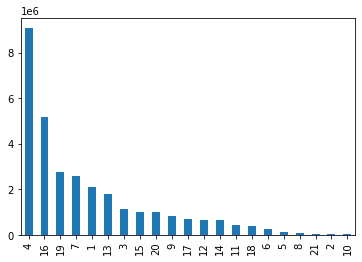

In [26]:
# Creating a bar chart of orders by department ID
department_bar = ords_prods_custs_2['department_id'].value_counts().plot.bar()

In [27]:
# Finding mean of number of orders placed and days since prior order grouped by department ID 
department_frequency = ords_prods_custs_2.groupby('department_id').agg({'number_of_orders_placed':['mean'],'days_since_prior_order':['mean']})

In [29]:
department_frequency

,number_of_orders_placed,days_since_prior_order
,mean,mean
department_id,,
1,16.160739,11.414062
2,18.096481,10.625000
3,17.856619,10.804688
4,18.495730,10.570312
5,16.034226,10.007812
6,17.174694,10.960938
7,17.901479,10.765625
8,15.995927,11.593750


In [28]:
# Creating cross tab to compare frequency flags by customer loyalty flag
loyalty_frequency = pd.crosstab(ords_prods_custs_2['loyalty_flag'], ords_prods_custs_2['frequency_flag'], dropna = False)

In [30]:
loyalty_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1293294,1983500,1526901
Regular customer,9631222,911475,5334079


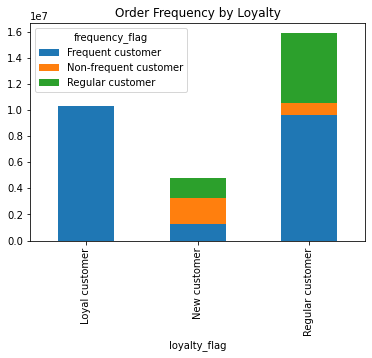

In [31]:
# Creating stacked bar chart of loyalty_frequency cross tab
loyalty_frequency_bar = loyalty_frequency.plot.bar(stacked = True, title = 'Order Frequency by Loyalty')

In [24]:
# Creating cross tab of price labels by customer loyalty flag
loyalty_price = pd.crosstab(ords_prods_custs_2['loyalty_flag'], ords_prods_custs_2['price_label'], dropna = False)

In [32]:
loyalty_price

price_label,High range product,Low range product,Mid range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


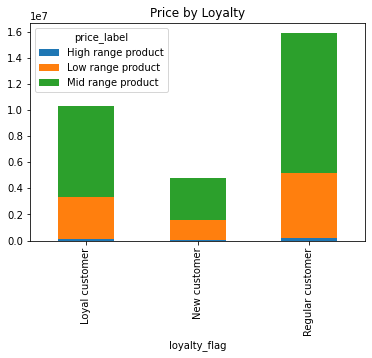

In [33]:
# Creating stacked bar chart of loyalty_price cross tab 
loyalty_price_bar = loyalty_price.plot.bar(stacked = True, title = 'Price by Loyalty')

In [34]:
# Creating cross tab of busiest days by customer loyalty flag
loyalty_busy = pd.crosstab(ords_prods_custs_2['loyalty_flag'], ords_prods_custs_2['busiest_days'], dropna = False)

In [35]:
loyalty_busy

busiest_days,Busiest days,Least busiest days,Regularly busy
loyalty_flag,,,
Loyal customer,3598132,2558537,4127424
New customer,1803781,1096349,1903565
Regular customer,5918383,3639643,6318750


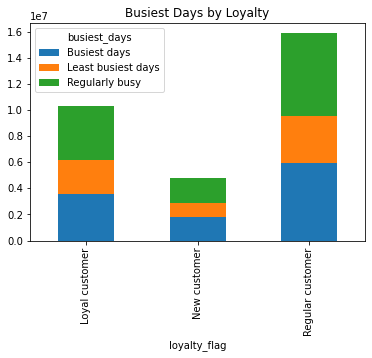

In [36]:
# Creating stacked bar chart of loyalty_busy cross tab 
loyalty_busy_bar = loyalty_busy.plot.bar(stacked = True, title = 'Busiest Days by Loyalty')

In [4]:
# Creating cross tab of frequency flag by region
region_frequency = pd.crosstab(ords_prods_custs_2['region'], ords_prods_custs_2['frequency_flag'], dropna = False)

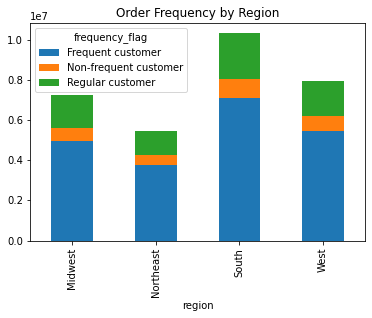

In [5]:
# Creating stacked bar chart of region_frequency cross tab
region_frequency_bar = region_frequency.plot.bar(stacked = True, title = 'Order Frequency by Region')

In [6]:
# Creating cross tab of price label by region
region_price = pd.crosstab(ords_prods_custs_2['region'], ords_prods_custs_2['price_label'], dropna = False)

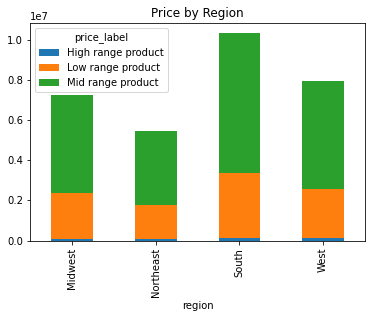

In [7]:
# Creating stacked bar chart of region_price cross tab
region_price_bar = region_price.plot.bar(stacked = True, title = 'Price by Region')

In [8]:
# Creating cross tab of busiest days by region
region_busy = pd.crosstab(ords_prods_custs_2['region'], ords_prods_custs_2['busiest_days'], dropna = False)

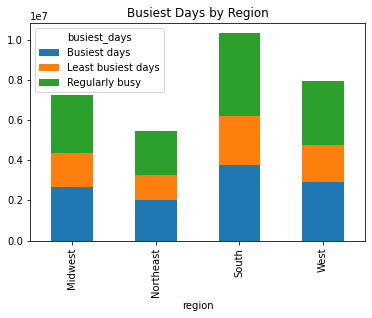

In [9]:
# Creating stacked bar chart of region_busy cross tab
region_busy_bar = region_busy.plot.bar(stacked = True, title = 'Busiest Days by Region')

In [5]:
# Using a For-Loop to create age group profiles

age_group = []

for value in ords_prods_custs_2['age']:
  if value >=18 and value <=24:
    age_group.append('18-24')
  elif value >=25 and value <=34:
    age_group.append('25-34')
  elif value >=35 and value <=44:  
    age_group.append('35-44')
  elif value >=45 and value <=54:  
    age_group.append('45-54')
  elif value >=55 and value <=64:  
    age_group.append('55-64')
  elif value >=65 and value <=74:  
    age_group.append('65-74')
  else:
    age_group.append('75+')
    
ords_prods_custs_2['age_group'] = age_group

C:\Users\maple\AppData\Local\Temp\ipykernel_4832\3642967140.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_2['age_group'] = age_group


In [6]:
age_family = pd.crosstab(ords_prods_custs_2['age_group'], ords_prods_custs_2['marital_status'], dropna = False)

In [7]:
age_family

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
18-24,0,1481172,1108512,825510
25-34,0,0,3589053,1238048
35-44,0,0,3633820,1202854
45-54,0,0,3688017,1199547
55-64,623313,0,3550723,628451
65-74,1175123,0,3607792,0
75+,846835,0,2565794,0


In [ ]:
age_family_bar = age_family.plot.bar(title = 'marital status by age group')

In [43]:
# Creating cross tab of frequency flag by profile
profile_frequency = pd.crosstab(ords_prods_custs_2['profile'], ords_prods_custs_2['frequency_flag'], dropna = False)

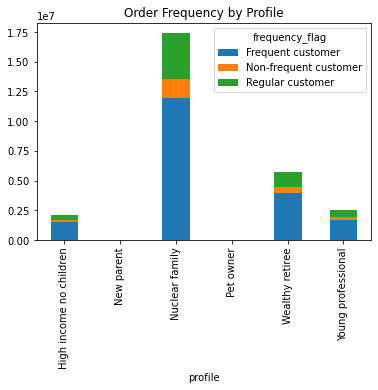

In [44]:
# Creating stacked bar chart of profile_frequency cross tab
profile_frequency_bar = profile_frequency.plot.bar(stacked = True, title = 'Order Frequency by Profile')

In [45]:
# Creating cross tab of price label by profile 
profile_price = pd.crosstab(ords_prods_custs_2['profile'], ords_prods_custs_2['price_label'], dropna = False)

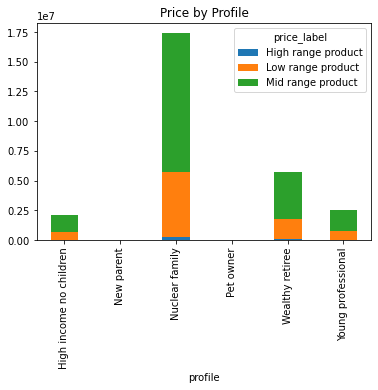

In [46]:
# Creating stacked bar chart of profile_price cross tab
profile_price_bar = profile_price.plot.bar(stacked = True, title = 'Price by Profile')

In [47]:
# Creating cross tab of busiest days by profile 
profile_busy = pd.crosstab(ords_prods_custs_2['profile'], ords_prods_custs_2['busiest_days'], dropna = False)

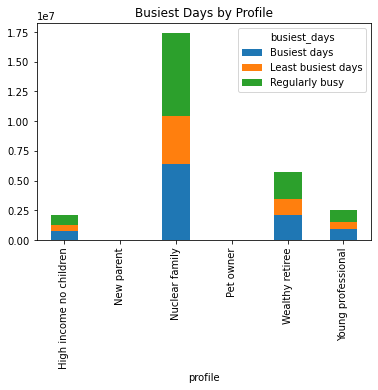

In [48]:
# Creating stacked bar chart of profile_busy cross tab
profile_busy_bar = profile_busy.plot.bar(stacked = True, title = 'Busiest Days by Profile')

In [49]:
# Creating cross tab of spender flag by profile 
profile_spending = pd.crosstab(ords_prods_custs_2['profile'], ords_prods_custs_2['spender_flag'], dropna = False)

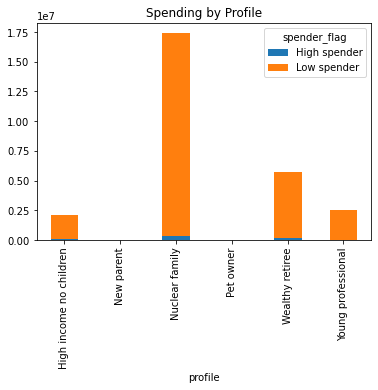

In [50]:
# Creating stacked bar chart of profile_spending cross taba
profile_spending_bar = profile_spending.plot.bar(stacked = True, title = 'Spending by Profile')

In [54]:
# Exporting visualizations
price_label_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_label_bar.png'),bbox_inches='tight')
department_frequency.to_csv(os.path.join(path, '04 Analysis', 'Visualizations', 'department_aggregates.csv'))
department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar.png'),bbox_inches='tight')
loyalty_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_frequency_bar.png'),bbox_inches='tight')
loyalty_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_bar.png'),bbox_inches='tight')
loyalty_busy_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_busy_bar.png'),bbox_inches='tight')
profile_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_frequency_bar.png'),bbox_inches='tight')
profile_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_price_bar.png'),bbox_inches='tight')
profile_busy_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_busy_bar.png'),bbox_inches='tight')
profile_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_spending_bar.png'),bbox_inches='tight')
age_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_bar.png'),bbox_inches='tight')
region_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_frequency_bar.png'),bbox_inches='tight')
region_price_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_price_bar.png'),bbox_inches='tight')
region_busy_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_busy_bar.png'),bbox_inches='tight')


In [ ]:
# Exporting final dataframe. Exporting in chunks due to memory issues. 
ords_prods_custs_2[:10000000].to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_final_1.pkl'))
ords_prods_custs_2[10000000:20000000].to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_final_2.pkl'))
ords_prods_custs_2[20000000:30964564].to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_final_3.pkl'))